## Step 1. Setting up environment

#### Step 1.1 install and import the necessary packages, and create a virtual environment

In [2]:
#I've already installed these packages
#pip install tensorflow openc-python matplotlib

In [3]:
#import packages
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import imghdr

#### Step 1.2 Remove inconsistent images

In [4]:
data_dir = 'data'
os.listdir(data_dir)

['cats', 'dogs']

In [5]:
image_exts = ['jpeg', 'png', 'bmp', 'jpg']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

#### Step 1.3 load in the data

In [7]:
import numpy as np

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 390 files belonging to 2 classes.


In [9]:
#convert to numpy iterator
data_iterator = data. as_numpy_iterator()
data_iterator

In [10]:
batch = data_iterator.next()

In [11]:
#images
batch[0].shape

(32, 256, 256, 3)

In [12]:
#labels
batch[1]

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

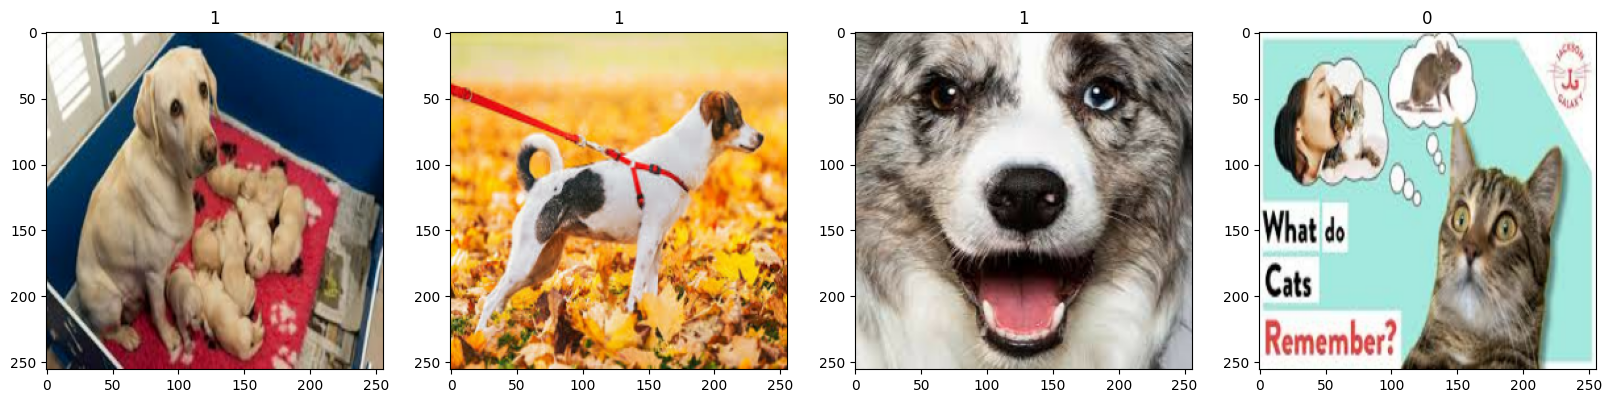

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 is set for dogs and 0 for cats.

## Step 2. Preprocessing

#### Step 2.1 Scale the data

In [14]:
data = data.map(lambda x, y: (x / 255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
batch = data.as_numpy_iterator().next()

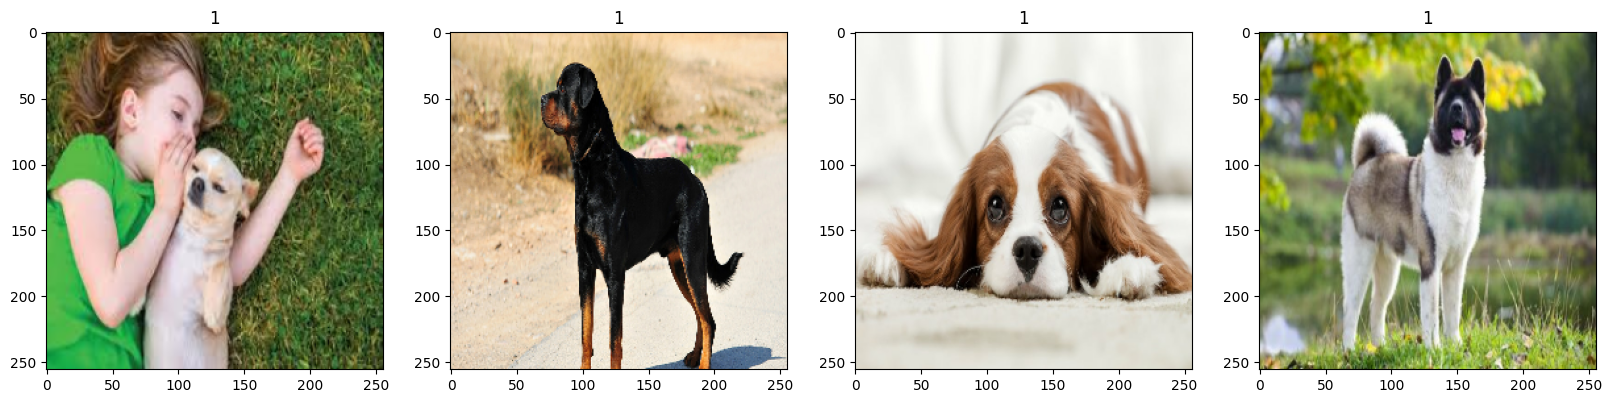

In [16]:
#double check the pictures
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### Step 2.2 Split data

In [17]:
len(data)

13

In [18]:
train_size = int(len(data) * .7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)+1

In [19]:
print (f"train size = {train_size}")
print (f"val size = {val_size}")
print(f"test size = {test_size}")

train size = 9
val size = 2
test size = 2


In [20]:
#allocate the sizes to the dataset
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## step 3 Build Deep Learning Model

#### step 3.1 build the model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 flatten (Flatten)           (None, 57600)             0

#### step 3.2 Train the model

In [26]:
#allow for early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping])

Epoch 1/20
9/9 [==============================] - 31s 2s/step - loss: 1.9320 - accuracy: 0.4931 - val_loss: 0.6287 - val_accuracy: 0.6719
Epoch 2/20
9/9 [==============================] - 20s 2s/step - loss: 0.7393 - accuracy: 0.4931 - val_loss: 0.6783 - val_accuracy: 0.5469
Epoch 3/20
9/9 [==============================] - 20s 2s/step - loss: 0.6783 - accuracy: 0.6076 - val_loss: 0.6705 - val_accuracy: 0.7344
Epoch 4/20
9/9 [==============================] - 22s 2s/step - loss: 0.6474 - accuracy: 0.7153 - val_loss: 0.6287 - val_accuracy: 0.5625
Epoch 5/20
9/9 [==============================] - 22s 2s/step - loss: 0.6058 - accuracy: 0.6701 - val_loss: 0.7185 - val_accuracy: 0.5938
Epoch 6/20
9/9 [==============================] - 22s 2s/step - loss: 0.6234 - accuracy: 0.6806 - val_loss: 0.5839 - val_accuracy: 0.8281
Epoch 7/20
9/9 [==============================] - 21s 2s/step - loss: 0.5527 - accuracy: 0.7882 - val_loss: 0.5082 - val_accuracy: 0.7969
Epoch 8/20
9/9 [==================

#### Step 3.3 plot the model performance

In [28]:
hist.history

{'loss': [1.932038426399231,
  0.7392823100090027,
  0.6782587766647339,
  0.6474268436431885,
  0.6058051586151123,
  0.6233595013618469,
  0.5526983737945557,
  0.4858153164386749,
  0.3712432086467743,
  0.29439181089401245,
  0.2425406575202942,
  0.15611068904399872,
  0.12141541391611099,
  0.11234177649021149,
  0.061902862042188644,
  0.06367912888526917,
  0.02630869299173355,
  0.026587102562189102,
  0.019211051985621452,
  0.009931743144989014],
 'accuracy': [0.4930555522441864,
  0.4930555522441864,
  0.6076388955116272,
  0.7152777910232544,
  0.6701388955116272,
  0.6805555820465088,
  0.7881944179534912,
  0.7986111044883728,
  0.875,
  0.8923611044883728,
  0.9097222089767456,
  0.96875,
  0.9722222089767456,
  0.9722222089767456,
  0.9861111044883728,
  0.9791666865348816,
  1.0,
  1.0,
  0.9965277910232544,
  1.0],
 'val_loss': [0.6286711692810059,
  0.6782574653625488,
  0.6704769134521484,
  0.6287166476249695,
  0.7185041904449463,
  0.5839489698410034,
  0.508201

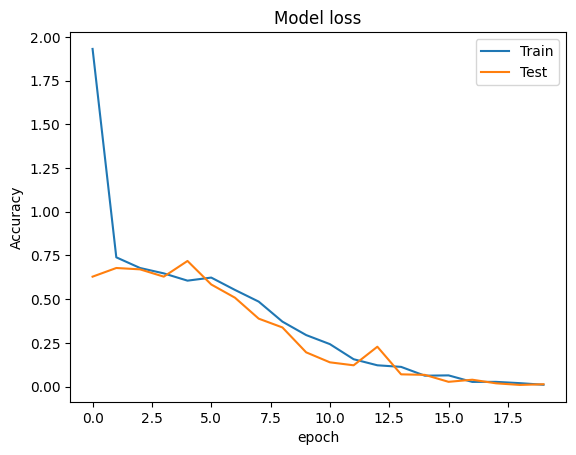

In [29]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()

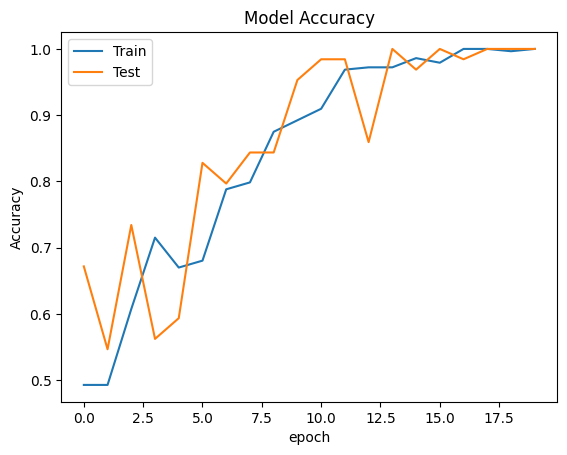

In [30]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()

#### Step 3. Model Evaluation

In [31]:
from keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    ypred = model.predict(X)
    precision.update_state(y, ypred)
    recall.update_state(y, ypred)
    accuracy.update_state(y, ypred)

1/1 [==============================] - 0s 83ms/step


In [41]:
print (f"precision = {precision.result()}")
print (f"recall  = {recall.result()}")
print (f"accuracy = {accuracy.result()}")

precision = 1.0
recall  = 1.0
accuracy = 1.0


#### Step 3.5 Model Testing

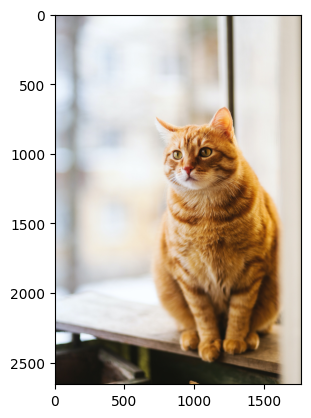

In [42]:
image = cv2.imread('cat_test.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

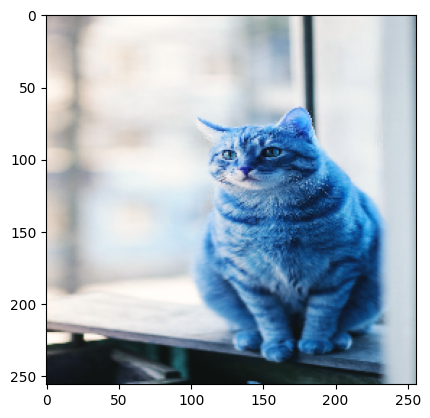

In [43]:
resize = tf.image.resize(image, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
ypred = model.predict(np.expand_dims(resize/255, 0))

if ypred < 0.5:
    print (f"it's a cat. Prediction  = {ypred}")
else:
    print (f"It's a dog. Prediction = {ypred}")

1/1 [==============================] - 0s 51ms/step
it's a cat. Prediction  = [[0.01022045]]


#### Step 3.6 Saving model

In [48]:
model.save(os.path.join('models', 'cat/dog_imageclassifier.h5'))